In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. Análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [2]:
dfWine = pd.read_csv('./data/winequality-red.csv')
dfWine.columns = ['acidez_fija','acidez_volatil','acido_citrico','azucar_residual','cloruros','libre_dioxido_azufre',
                  'dioxido_azufre_total','densidad','ph','sulfatos','alcohol','calidad' ]
dfWine.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,libre_dioxido_azufre,dioxido_azufre_total,densidad,ph,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dfWine.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,libre_dioxido_azufre,dioxido_azufre_total,densidad,ph,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
#Identificacion de datos faltantes nulos
dfWine.isnull().sum()

acidez_fija             0
acidez_volatil          0
acido_citrico           0
azucar_residual         0
cloruros                0
libre_dioxido_azufre    0
dioxido_azufre_total    0
densidad                0
ph                      0
sulfatos                0
alcohol                 0
calidad                 0
dtype: int64

In [5]:
#Identificacion de datos faltantes no calculados
dfWine.isna().sum()

acidez_fija             0
acidez_volatil          0
acido_citrico           0
azucar_residual         0
cloruros                0
libre_dioxido_azufre    0
dioxido_azufre_total    0
densidad                0
ph                      0
sulfatos                0
alcohol                 0
calidad                 0
dtype: int64

In [6]:
#Identificacion de columnas y completitud de los datos
print("Cantidad de Filas y Columnas", dfWine.shape,"\n")
dfWine.info()

Cantidad de Filas y Columnas (1599, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidez_fija           1599 non-null   float64
 1   acidez_volatil        1599 non-null   float64
 2   acido_citrico         1599 non-null   float64
 3   azucar_residual       1599 non-null   float64
 4   cloruros              1599 non-null   float64
 5   libre_dioxido_azufre  1599 non-null   float64
 6   dioxido_azufre_total  1599 non-null   float64
 7   densidad              1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulfatos              1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  calidad               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


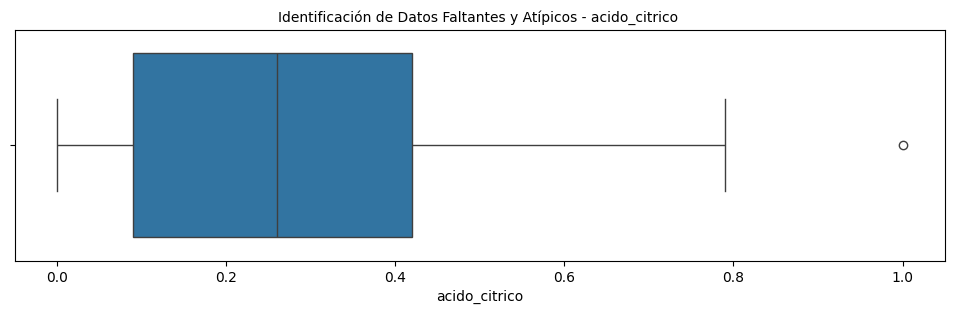

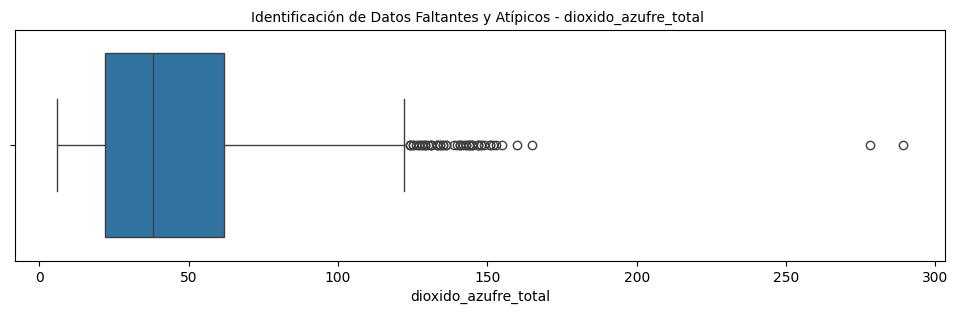

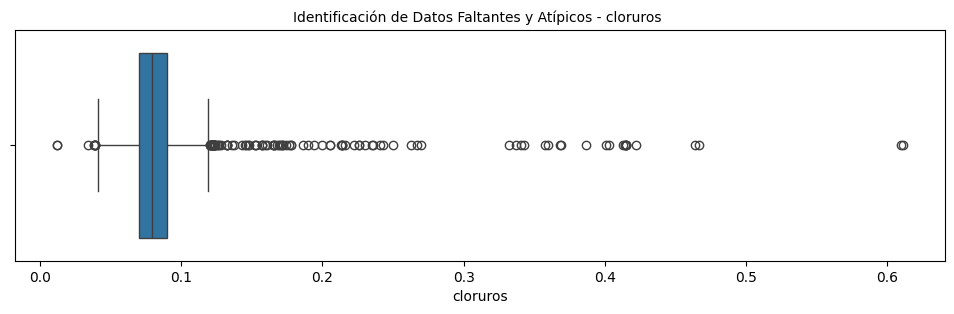

In [7]:
#Identificación de los Datos atípicos
lista = ['acido_citrico','dioxido_azufre_total', 'cloruros']
for columnas in lista:
    plt.figure(figsize=(12, 3))
    sns.boxplot(x=dfWine[columnas])
    plt.title(f'Identificación de Datos Faltantes y Atípicos - {columnas} ', fontsize=10 )

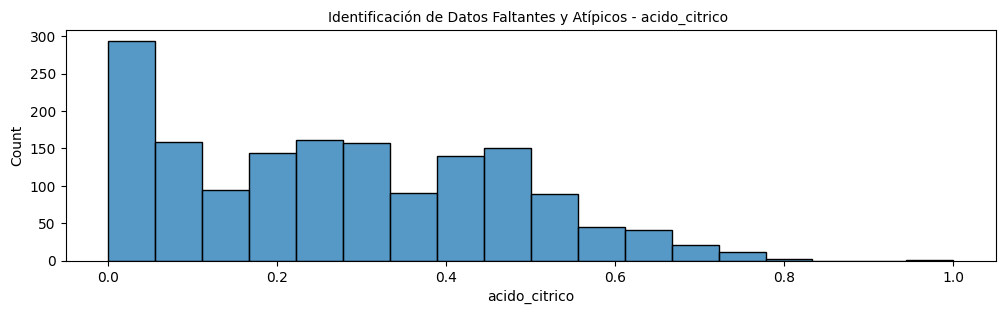

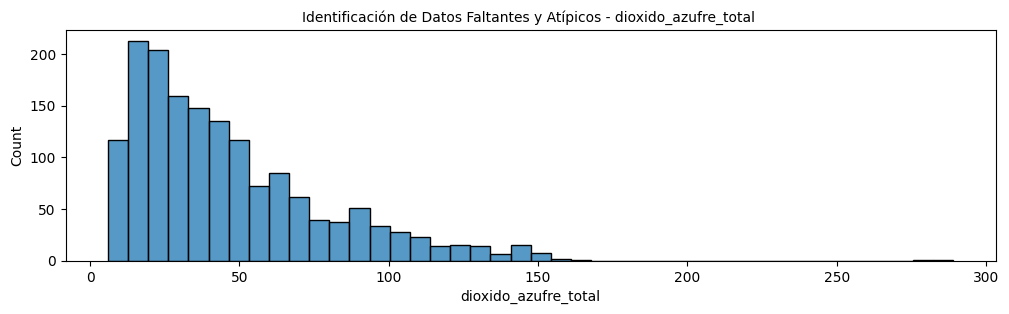

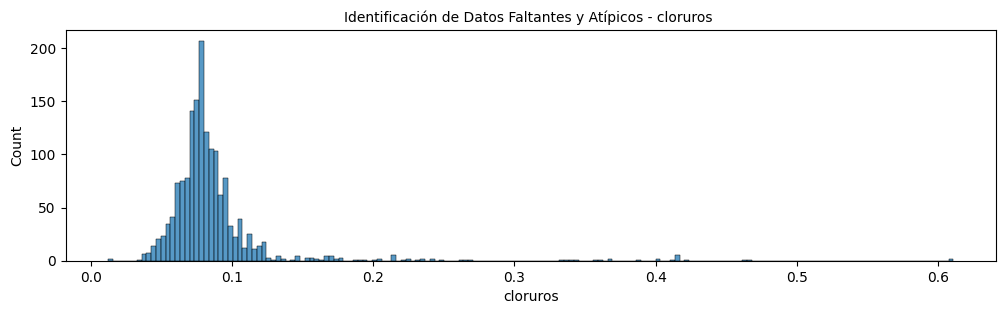

In [8]:
#Histogramas de columnas con valores atipicos
lista = ['acido_citrico','dioxido_azufre_total', 'cloruros']
for columnas in lista:
    plt.figure(figsize=(12, 3))
    sns.histplot(dfWine[columnas])
    plt.title(f'Identificación de Datos Faltantes y Atípicos - {columnas} ', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [9]:
# Funcion de validacion de atipicos
def validar_atipicos(colum, nivel_minimo, nivel_maximo):
    Total_Atipicos=((dfWine[colum]<nivel_minimo)|(dfWine[colum]>nivel_maximo)).sum()
    return print(f"Total de datos atípicos {colum}:  ",Total_Atipicos)

#Funcion de filtro de atipicos
def filtro_atipicos(df, colum, nivel_minimo, nivel_maximo ):
    df=df[(df[colum]<=nivel_maximo)&(df[colum]>=nivel_minimo)]
    return df

In [10]:
atipicos = {'acido_citrico':{ 'nivel_minimo':0, 'nivel_maximo':0.8},
            'cloruros':{ 'nivel_minimo':0, 'nivel_maximo':0.5},
            'dioxido_azufre_total':{ 'nivel_minimo':0, 'nivel_maximo':250}}

In [11]:
#conteo y limpieza de valores atipicos en acido_citrico
for key in atipicos.keys():
    n_maximo = atipicos[key]['nivel_maximo']
    n_minimo = atipicos[key]['nivel_minimo']
    validar_atipicos(key, n_minimo, n_maximo)
    dfWine = filtro_atipicos(dfWine, key, n_minimo, n_maximo )
    print(f"despues de Limpieza", validar_atipicos(key, n_minimo, n_maximo),"\n")

Total de datos atípicos acido_citrico:   1
Total de datos atípicos acido_citrico:   0
despues de Limpieza None 

Total de datos atípicos cloruros:   1
Total de datos atípicos cloruros:   0
despues de Limpieza None 

Total de datos atípicos dioxido_azufre_total:   2
Total de datos atípicos dioxido_azufre_total:   0
despues de Limpieza None 



In [12]:
dfWine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1595 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidez_fija           1595 non-null   float64
 1   acidez_volatil        1595 non-null   float64
 2   acido_citrico         1595 non-null   float64
 3   azucar_residual       1595 non-null   float64
 4   cloruros              1595 non-null   float64
 5   libre_dioxido_azufre  1595 non-null   float64
 6   dioxido_azufre_total  1595 non-null   float64
 7   densidad              1595 non-null   float64
 8   ph                    1595 non-null   float64
 9   sulfatos              1595 non-null   float64
 10  alcohol               1595 non-null   float64
 11  calidad               1595 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.0 KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Caracteristica de interes: 
 - La calidad del vino basado en sus diferentes metricas de  1 a 10 en calidad
 - Predecir la calidad del vino

In [13]:
dfWine['calidad'].value_counts()

calidad
5    680
6    638
7    197
4     52
8     18
3     10
Name: count, dtype: int64

(array([ 10.,   0.,  52.,   0., 680.,   0., 638.,   0., 197.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

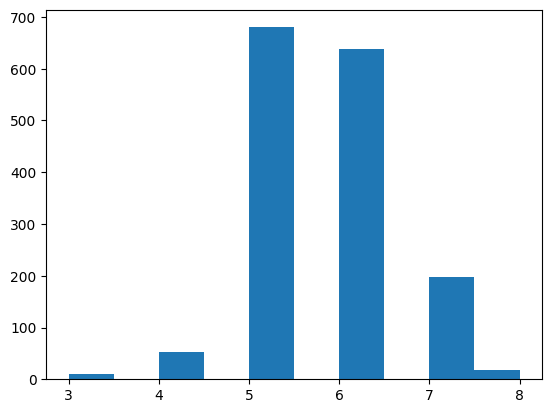

In [14]:
plt.hist(dfWine['calidad'])

<Axes: xlabel='acido_citrico', ylabel='densidad'>

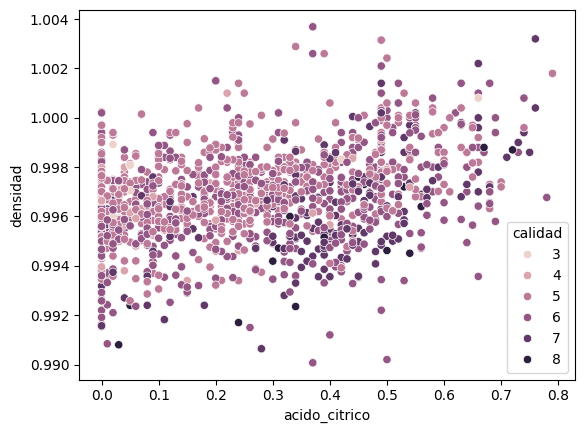

In [15]:
sns.scatterplot(x = "acido_citrico", y = "densidad", hue = "calidad", data = dfWine)

<Axes: xlabel='dioxido_azufre_total', ylabel='libre_dioxido_azufre'>

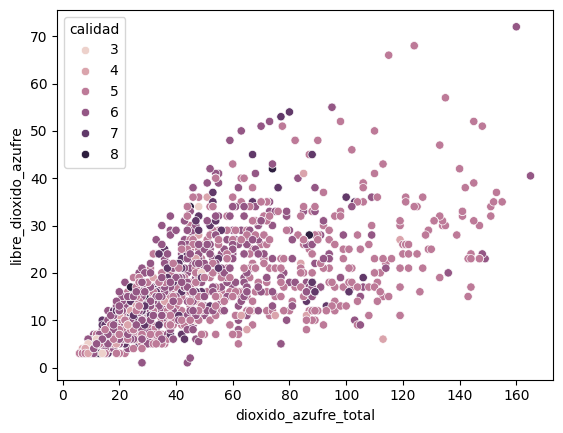

In [16]:
sns.scatterplot(x = "dioxido_azufre_total", y = "libre_dioxido_azufre", hue = "calidad", data = dfWine)

## 4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [17]:
#seleccionar las columnas para el entrenamiento
predictors = dfWine.drop('calidad',axis=1)
target = dfWine['calidad']

In [18]:
predictors.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,libre_dioxido_azufre,dioxido_azufre_total,densidad,ph,sulfatos,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
target.head()

0    5
1    5
2    5
3    6
4    5
Name: calidad, dtype: int64

In [20]:
corr = predictors.corr()
corr

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,libre_dioxido_azufre,dioxido_azufre_total,densidad,ph,sulfatos,alcohol
acidez_fija,1.000000,-0.256984,0.678040,0.116973,0.100600,-0.154406,-0.115077,0.669100,-0.688051,0.185575,-0.061211
acidez_volatil,-0.256984,1.000000,-0.553716,0.008335,0.070749,-0.007509,0.091094,0.019129,0.233072,-0.267501,-0.200639
acido_citrico,0.678040,-0.553716,1.000000,0.134868,0.178310,-0.069748,0.015661,0.370864,-0.534416,0.300930,0.110312
azucar_residual,0.116973,0.008335,0.134868,1.000000,0.064919,0.178170,0.173417,0.369492,-0.076152,0.008396,0.033558
cloruros,0.100600,0.070749,0.178310,0.064919,1.000000,0.002307,0.056292,0.205254,-0.252044,0.324117,-0.224786
libre_dioxido_azufre,-0.154406,-0.007509,-0.069748,0.178170,0.002307,1.000000,0.673039,-0.018592,0.079124,0.049310,-0.073948
dioxido_azufre_total,-0.115077,0.091094,0.015661,0.173417,0.056292,0.673039,1.000000,0.091065,-0.049310,0.050336,-0.229349
densidad,0.669100,0.019129,0.370864,0.369492,0.205254,-0.018592,0.091065,1.000000,-0.346453,0.142775,-0.493777
ph,-0.688051,0.233072,-0.534416,-0.076152,-0.252044,0.079124,-0.049310,-0.346453,1.000000,-0.182594,0.208835
sulfatos,0.185575,-0.267501,0.300930,0.008396,0.324117,0.049310,0.050336,0.142775,-0.182594,1.000000,0.105224


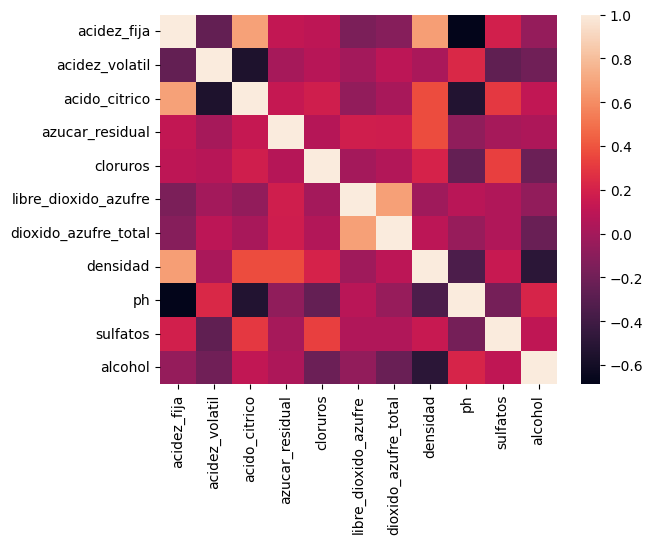

In [21]:
sns.heatmap(corr)
plt.show()

## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [22]:
# Porcentaje de datos para entrenamiento (train) = 80% , y para prueba (test) = 20%
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state=13)

In [23]:
tree = DecisionTreeClassifier()

In [24]:
arbol = tree.fit(X_train, y_train)

[Text(0.507792349852616, 0.975, 'x[10] <= 10.35\ngini = 0.647\nsamples = 1276\nvalue = [8, 47, 531, 516, 157, 17]'),
 Text(0.25184229918938833, 0.925, 'x[9] <= 0.585\ngini = 0.535\nsamples = 695\nvalue = [6.0, 27.0, 417.0, 223.0, 20.0, 2.0]'),
 Text(0.13259948415622697, 0.875, 'x[6] <= 98.5\ngini = 0.448\nsamples = 332\nvalue = [4, 19, 235, 72, 2, 0]'),
 Text(0.0898120854826824, 0.825, 'x[9] <= 0.525\ngini = 0.49\nsamples = 280\nvalue = [4, 19, 187, 68, 2, 0]'),
 Text(0.04329403095062638, 0.775, 'x[10] <= 9.533\ngini = 0.422\nsamples = 124\nvalue = [2, 13, 92, 16, 1, 0]'),
 Text(0.013264554163596167, 0.725, 'x[10] <= 9.15\ngini = 0.258\nsamples = 69\nvalue = [0, 6, 59, 4, 0, 0]'),
 Text(0.0058953574060427415, 0.675, 'x[2] <= 0.245\ngini = 0.642\nsamples = 9\nvalue = [0, 4, 3, 2, 0, 0]'),
 Text(0.0029476787030213707, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0, 0]'),
 Text(0.008843036109064112, 0.625, 'x[7] <= 0.998\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 3, 2, 0, 0]'),
 T

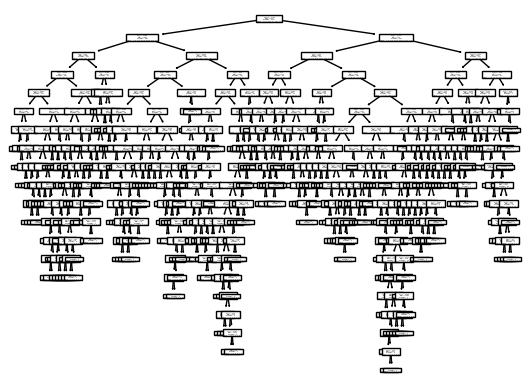

In [25]:
plot_tree(arbol)

In [26]:
predicciones = arbol.predict(X_test)

In [27]:
predicciones

array([5, 6, 6, 5, 6, 6, 4, 5, 6, 6, 4, 7, 7, 6, 6, 7, 6, 6, 6, 5, 6, 5,
       5, 5, 7, 5, 6, 8, 5, 4, 6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 8, 7, 5, 7,
       5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5, 6, 5, 6, 5, 7, 5, 6, 6, 5,
       5, 5, 5, 5, 6, 7, 6, 4, 6, 6, 6, 6, 6, 7, 5, 5, 7, 6, 5, 5, 4, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 5, 3, 7, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 4, 5, 7, 4,
       5, 6, 5, 6, 5, 5, 6, 7, 5, 6, 5, 6, 5, 5, 7, 6, 6, 6, 7, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 7, 7, 5, 5, 6,
       6, 7, 6, 5, 5, 4, 6, 7, 6, 5, 5, 5, 5, 5, 6, 5, 4, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 7, 4, 7, 7, 5, 7, 6, 5, 7, 5, 6, 7, 7, 5, 6, 5, 5,
       5, 7, 5, 6, 7, 7, 7, 6, 6, 6, 6, 5, 6, 5, 5, 8, 5, 6, 6, 7, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 4, 5, 5, 6, 5, 6, 5, 7, 6, 6, 7, 5, 5, 5, 6,
       5, 5, 7, 6, 5, 6, 6, 5, 5, 6, 6, 3, 5, 5, 4, 5, 6, 5, 6, 6, 8, 5,
       5, 7, 5, 5, 6, 5, 7, 6, 5, 5, 5, 6, 4, 5, 6,

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [28]:
# Desempeño del Arbol de desiciones
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.40      0.22         5
           5       0.75      0.69      0.72       149
           6       0.59      0.60      0.60       122
           7       0.50      0.50      0.50        40
           8       0.00      0.00      0.00         1

    accuracy                           0.62       319
   macro avg       0.33      0.36      0.34       319
weighted avg       0.64      0.62      0.63       319



In [31]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6206896551724138

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

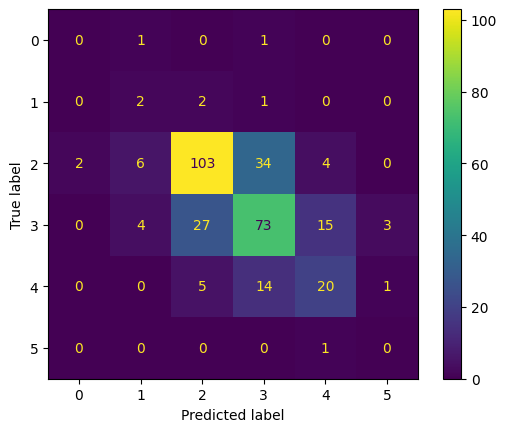

In [34]:
# Curva de precisón del modelo
cm=confusion_matrix(y_test,predicciones)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<Axes: ylabel='calidad'>

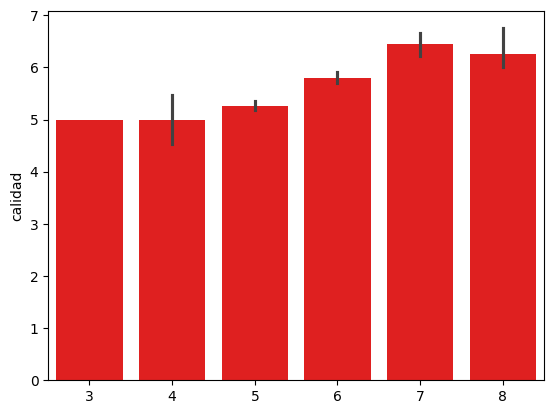

In [37]:
sns.barplot(x=predicciones, y=y_test, color='r')

## 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

- La presicion del modelo entrega la proporcion de veces que el modelo acierta en sus predicciones para este caso, la precisión de la clase "calidad" es de 0,62, lo que indica que el 62% de los casos predichos de acuerdo a la calidad del vino teniendo en cuenta los demas campos fueron acertados en su nivel de calidad.

- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "calidad" numero 5 es 0,69, lo que indica que el modelo identificó correctamente al 69% de todas las calidades de vino.

- El Recall para la clase de calidad número 5 es 0,69, lo que significa que el modelo identificó correctamente el 69% de todas las calidades de vino en esa categoria. En otras palabras, el Recall nos proporciona información sobre la capacidad del modelo para detectar positivos verdaderos (en este caso, calidades de vino específicas). Cuanto mayor sea el Recall, mejor será la capacidad del modelo para identificar correctamente los casos positivos reales.

La metrica F1 score que combina tanto la precisión como el Recall en un solo valor. Proporciona una medida equilibrada del rendimiento del modelo en clasificación. la puntuación F1 para la calidad número 5 es 0,72, lo que sugiere un equilibrio entre la precisión y el recuerdo.

- El AUC es 0,62 lo que significa que el 62 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.

